# 优化算法
> 优化算法：坐标下降法（Coordinate Descent）、最小角回归（LARS） 和 梯度下降法（Gradient Descent）
1. **梯度下降法（Gradient Descent）**
基于梯度信息，沿着函数反梯度方向下降，所有参数更新
给定目标函数 $f(\boldsymbol{\beta}) $，梯度下降法的更新规则是：
$$
\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \eta \nabla f(\boldsymbol{\beta}^{(t)})
$$


2. **坐标下降法（Coordinate Descent）**
基于梯度信息，沿着函数反梯度方向下降，但是每次只更新一个参数，即一个偏导方向。
  
- **坐标下降法** 实际上可以看作是梯度下降法的一种特殊形式，它在每次更新时**只沿着某一方向（即某个特征的方向）进行调整**。具体来说，坐标下降法的更新规则是：
$$
  \beta_j^{(t+1)} = \beta_j^{(t)} - \eta \frac{\partial f(\boldsymbol{\beta})}{\partial \beta_j}
$$

3. **最小角回归（LARS）**
计算对特征系数对残差的贡献，找到最相关的特征，进行更新
$$c_j = \mathbf{x}_j^T \mathbf{r}$$

# 正弦波 Sin Wave


$$
y = A \sin(2\pi f t + \phi)
$$

其中：
- $ A$（振幅）：波的高度，决定波的最大值和最小值。
- $f $（频率）：每秒振荡的次数，单位是赫兹（Hz）。
- $t$（时间）：波随时间的变化。
- $ \phi$（相位）：波的起始位置，影响波的左右偏移。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
t = np.linspace(0,2,100) # 时间序列
y = np.sin(2*np.pi*1*t) # 频率1，一秒振动一次（一周期）

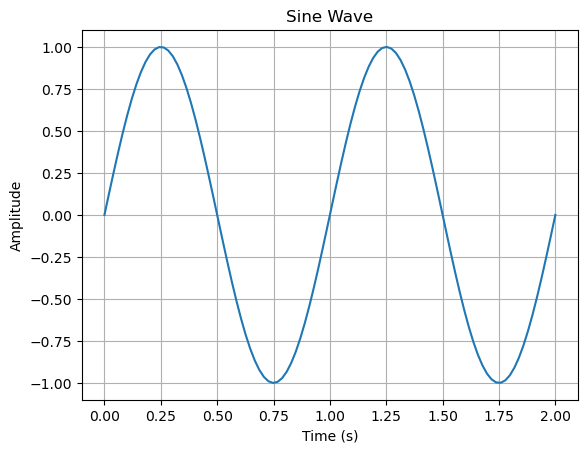

In [10]:
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave")
plt.grid()
plt.show()

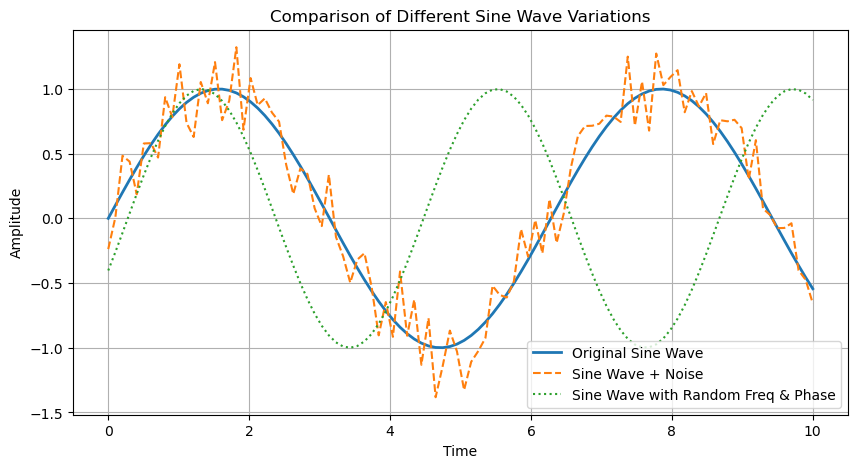

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
times = np.linspace(0, 10, 100)

# 方式 1：固定正弦波 + 直接加噪音： 正弦波上下抖动
y_clean = np.sin(times)
y_noisy = y_clean + np.random.normal(0, 0.2, size=times.shape)

# 方式 2：改变正弦波的频率和相位 ： 正弦波变形
random_freq = 1.0 + rng.randn(1)  # 频率有轻微变化
random_phase = 3 * rng.randn(1)   # 相位有轻微变化
y_variable = np.sin(random_freq * times + random_phase)

# 画图
plt.figure(figsize=(10, 5))
plt.plot(times, y_clean, label="Original Sine Wave", linewidth=2)
plt.plot(times, y_noisy, label="Sine Wave + Noise", linestyle="dashed")
plt.plot(times, y_variable, label="Sine Wave with Random Freq & Phase", linestyle="dotted")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Comparison of Different Sine Wave Variations")
plt.legend()
plt.grid()
plt.show()


# 标准化
$$
  X_{ij} = \frac{X_{ij}}{\sigma_j}
$$
$$
  \sigma_j = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (X_{ij} - \bar{X}_j)^2}
$$
标准化就是 数据 / 标准差。 让数据量纲同一，可以比较

`X /= X.std(axis=0)	`让每列的标准差变成 1，但均值不变
`StandardScaler().fit_transform(X)	`让每列均值变成 0，标准差变成 1

# 贝叶斯
核心就是 根据数据(似然函数) 矫正先验， 得到后验知识。  
贝叶斯家族是根据 超参数怎么处理 / 怎么求后验， 产生各种名字

|类型	|超参数处理	|计算后验	|例子工具	|优点	|缺点|
|--|--|--|--|--|--|
|普通贝叶斯	|固定	|直接计算后验	|解析解	|简单快速	|需手动调参|
|经验贝叶斯	|数据点估计	|优化边缘似然	|scikit-learn	|自动调参，较快	|丢不确定性|
|完全贝叶斯	|加超先验分布	|MCMC/变分推断	|PyMC3, Stan	|保留不确定性	|计算复杂|
|贝叶斯估计	|泛指估计方式|	点估计或分布	|视具体方法	|灵活	|非具体方法|

- 参数多不多：只有主要参数，还是有超参数？
- 怎么算后验：精确算，还是近似算？
- 超参数咋办：固定、估计，还是给分布？

贝叶斯核心是 最大化似然函数吗？ 结果是优化后验概率？

# Log的意义：
- 稳定数据分布
- 优化梯度计算
- 避免概率数值下溢。

**1. 对数变换**  
许多数据分布都是右偏的（指数、长尾）。
对数变换可以稳定方差：更近正态分布（许多模型的假设）；减少异常值影响

2. **对数概率（Log-Likelihood）**  
在概率模型（如 **贝叶斯模型、高斯混合模型（GMM）、隐马尔可夫模型（HMM）**）中，经常计算 **对数似然（log-likelihood）**：
$$
\log P(X|\theta) = \sum \log P(x_i|\theta)
$$
- 直接使用概率可能会导致 **数值下溢**（特别是多个小概率连乘）。
- 取对数后，连乘变加法，计算更稳定，梯度计算也更容易处理。

3. **正态分布的 log 计算**  
正态分布的概率密度函数（PDF）：
$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
取对数后：
$$
\log P(x) = -\frac{(x - \mu)^2}{2\sigma^2} - \log \sqrt{2\pi\sigma^2}
$$
好处：
- **简化梯度计算**（常用于 MLE 估计）。
- **用于高斯过程（Gaussian Process）**，求解核函数的似然优化。
- **用于 KL 散度（Kullback-Leibler Divergence）** 计算分布之间的差异。


4. **Softmax & 交叉熵**  
Softmax 计算类别概率：
$$
p_i = \frac{e^{z_i}}{\sum e^{z_j}}
$$
交叉熵损失：
$$
L = -\sum y_i \log p_i
$$
- **log 让概率乘法变加法，避免下溢。**
- **交叉熵损失 = 负对数似然（Negative Log-Likelihood, NLL）**，广泛用于分类任务。

5. **信息论中的作用**  
在信息论和机器学习交叉领域，log 也常用于：
- **熵（Entropy）**：$$ H(X) = -\sum P(x) \log P(x) $$
- **KL 散度**：衡量两个分布的差异。